# 01 Differential Geometry for Engineers

## B) Affine Connection and Riemannian Metrics

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE
- Texts and illustrations by Adele Myers @ BioShape Lab.
- Textbook: Guigui, Miolane, Pennec, 2022. Introduction to Riemannian Geometry and Geometric Statistics.

<center><img src="figs/01_geod_sphere.png" width=400px alt="default"/></center>

<center><img src="figs/01_geod.png" width=400px alt="default"/></center>

# Outline

- **Unit 1 (Geometry - Math!)**: **Differential Geometry for Engineers**
- **Unit 2 (Shapes)**: Computational Representations of Biomedical Shapes
- **Unit 3 (Machine Learning)**: Geometric Machine Learning for Shape Analysis
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis

<center><img src="figs/00_bioshape.jpg" width=350px alt="default"/></center>

Examples and applications will be taken from cutting-edge research in the **biomedical field**.

# Last Lecture

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
  - **A) Manifolds and Lie groups**
    - Our data spaces.
  - B) Connections and Riemannian Metrics
    - Tools we use to compute on these spaces.
    
<center><img src="figs/01_triangles_2d.png" width=400px alt="default"/></center>

# This Lecture

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
  - A) Manifolds and Lie groups
    - Our data spaces.
  - **B) Connections and Riemannian Metrics**
    - Tools we use to compute on these spaces.
    
<center><img src="figs/01_tools.jpeg" width=400px alt="default"/></center>


# Outline

You will learn:

0. Motivation: Elementary ML Operations
1. What is a connection?
2. Why do we care about connection?
3. How can we implement connection?
4. What is a Riemannian metric?
5. Why do we care about Riemannian metrics?
6. How can we implement Riemannian metrics?
7. Curvature
8. Visualization on manifolds

# Outline

You will learn:

0. **Motivation: Elementary ML Operations**
1. What is a connection?
2. Why do we care about connection?
3. How can we implement connection?
4. What is a Riemannian metric?
5. Why do we care about Riemannian metrics?
6. How can we implement Riemannian metrics?
7. Curvature
8. Visualization on manifolds

# Motivation: Elementary Operations in ML

Machine Learning (ML) relies on fundamental operations from linear algebra, i.e. operations on vector spaces.
- $\color{#EF5645}{\text{Addition}}$: adding a vector to a point to get a point
  - $\color{#047C91}{\text{Example}}$: Gradient ascent: $x_{k+1} = x_k + \nabla_x f(x)$ -- to maximize an objective $f$ with respect to parameters $x$.
- $\color{#EF5645}{\text{Subtraction}}$: subtracting two points to get a vector
  - $\color{#047C91}{\text{Example}}$: Rate of change of the parameter: $x_{k+1} - x_k$ 

<center><img src="figs/01_gd.png" width=500px alt="default"/></center>


- $\color{#EF5645}{\text{Distance}}$: Computing the distance between two points
  - $\color{#047C91}{\text{Example}}$: In $K$-nearest neighbors, need a notion of distance to find which points are the "nearest neighbors".
  
<center><img src="figs/01_knn.png" width=400px alt="default"/></center>

- $\color{#EF5645}{\text{Straight Line}}$: Computing the line joining two points, i.e. the curve of shortest length.
  - $\color{#047C91}{\text{Example}}$: In linear regression, we fit a line to the data points.
  
<center><img src="figs/01_lr.png" width=400px alt="default"/></center>

Generalizing Machine Learning (ML) to manifolds starts with generalizing the elementary operations:

- $\color{#EF5645}{\text{Addition}}$: add a vector to a point ot get a point --> $\color{#047C91}{\text{Exponential}}$
- $\color{#EF5645}{\text{Subtraction}}$: subtract two points to get a vector --> $\color{#047C91}{\text{Logarithm}}$
- $\color{#EF5645}{\text{Distance}}$: compute distance between two points --> $\color{#047C91}{\text{Geodesic Distance}}$
- $\color{#EF5645}{\text{Straight Line}}$: computing the curve of shortest length between two points --> $\color{#047C91}{\text{Geodesic}}$


### Addition --> Exponential

$\color{#EF5645}{\text{Intuition}}$: The generalization of the addition for manifolds is called the exponential. Note that it is (in general) different from the exponential function.

We can use the `exp` method from the `sphere`. Note the fact that we use the `metric` attribute of the sphere.

In [1]:
import numpy as np
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2)

point = np.array([-0.65726771, -0.02678122, 0.7531812])
vector = np.array([1, 0, 0.8])
tangent_vector = sphere.to_tangent(vector, base_point=point)

result = sphere.metric.exp(tangent_vector, base_point=point)

INFO: Using numpy backend


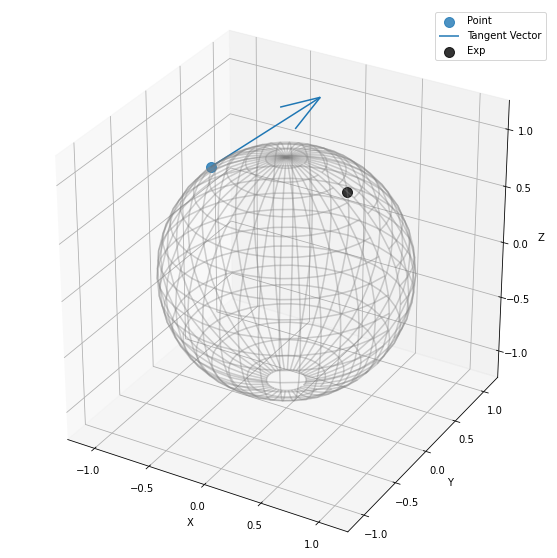

In [2]:
import matplotlib.pyplot as plt
import geomstats.visualization as viz

fig = plt.figure(figsize=(10, 10)); ax = fig.add_subplot(111, projection="3d")

ax = viz.plot(point, ax=ax, space="S2", s=100, alpha=0.8, label="Point")
arrow = viz.Arrow3D(point, vector=tangent_vector); arrow.draw(ax, color="C0", label="Tangent Vector")
ax = viz.plot(result, ax=ax, space="S2", s=100, alpha=0.8, label="Exp", color="black")
ax.legend();

### Subtraction --> Logarithm

$\color{#EF5645}{\text{Intuition}}$: The generalization of the subtraction for manifolds is called the logarithm. Note that it is (in general) different from the logarithm function.

We can use the `log` method from the `sphere`. Note the fact that we use the `metric` attribute of the sphere.

In [3]:
import numpy as np
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2)

point1 = np.array([-0.48202861, 0.61760022, 0.62146471])
point2 = np.array([0.50862172, -0.25293377, -0.82299967])

result = sphere.metric.log(point2, base_point=point1)

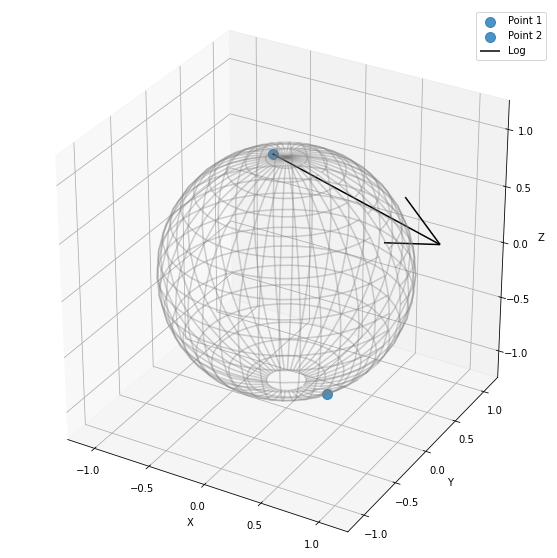

In [4]:
import matplotlib.pyplot as plt
import geomstats.visualization as viz

fig = plt.figure(figsize=(10, 10)); ax = fig.add_subplot(111, projection="3d")

ax = viz.plot(point1, ax=ax, space="S2", s=100, alpha=0.8, label="Point 1", c="C0")
ax = viz.plot(point2, ax=ax, space="S2", s=100, alpha=0.8, label="Point 2", c="C0")
arrow = viz.Arrow3D(point1, vector=result); arrow.draw(ax, color="black", label="Log")
ax.legend();

### Straight Line --> Geodesic


$\color{#EF5645}{\text{Intuition}}$: The generalization of the straight line for manifolds is called the geodesic.

We can use the `geodesic` method from the `sphere`. Note the fact that we use the `metric` attribute of the sphere.

In [5]:
import numpy as np
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2)

point = np.array([-0.65726771, -0.02678122, 0.7531812])
vector = np.array([1, 0, 0.8])
tangent_vector = sphere.to_tangent(vector, base_point=point)

result = sphere.metric.geodesic(initial_tangent_vec=tangent_vector, initial_point=point)
points_on_geodesic = result(np.linspace(0.0, 1.0, 30))

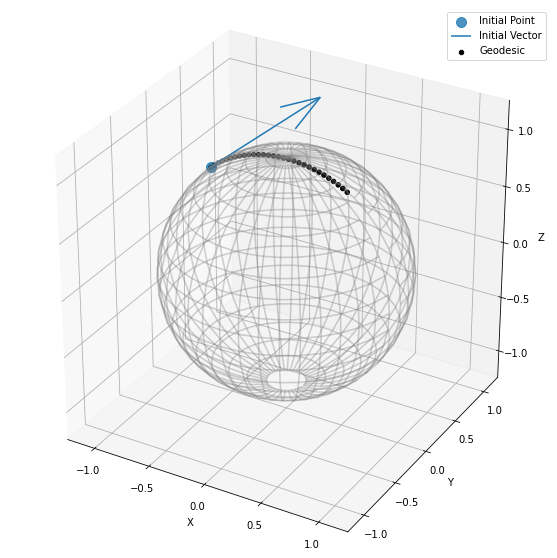

In [6]:
fig = plt.figure(figsize=(10, 10)); ax = fig.add_subplot(111, projection="3d")

ax = viz.plot(point, ax=ax, space="S2", s=100, alpha=0.8, label="Initial Point")
arrow = viz.Arrow3D(point, vector=tangent_vector); arrow.draw(ax, color="C0", label="Initial Vector")
ax = viz.plot(points_on_geodesic, ax=ax, space="S2", color="black", label="Geodesic")

ax.legend();

### Geodesic on a more complicated manifold

The same syntax allows us to compute the geodesic between two bone cancer cell shapes.

In [7]:
from geomstats.geometry.discrete_curves import R2, DiscreteCurves, SRVMetric
import geomstats.datasets.utils as data_utils

cells, _, _ = data_utils.load_cells()
curve_space = DiscreteCurves(R2); metric = curve_space.square_root_velocity_metric
cell1 = cells[69] - np.mean(cells[69], axis=0); cell2 = cells[76] - np.mean(cells[76], axis=0)
geodesic = metric.geodesic(initial_curve=cell1, end_curve=cell2)

n_times = 80; times = np.linspace(0.0, 1.0, n_times); geod_points = geodesic(times)

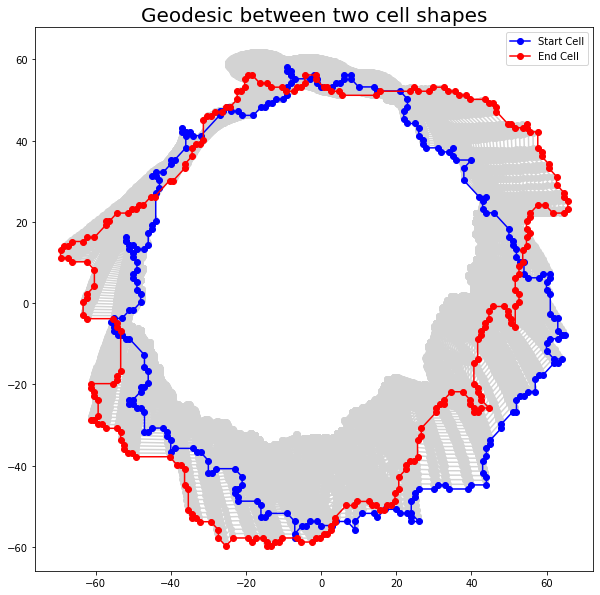

In [8]:
plt.figure(figsize=(10, 10))
for i in range(1, n_times - 1):
    plt.plot(geod_points[i, :, 0], geod_points[i, :, 1], "o-", color="lightgrey")
plt.plot(geod_points[0, :, 0], geod_points[0, :, 1], "o-b", label="Start Cell")
plt.plot(geod_points[-1, :, 0], geod_points[-1, :, 1], "o-r", label="End Cell")

plt.title("Geodesic between two cell shapes", fontsize=20); plt.legend();

# What are Exp, Log, Dist and Geodesics?

- Exp, Log, Dist and Geodesic are common operations that can be defined on manifolds.
- We will use them in the context of shape spaces.
- We present here in all generality, so that you can use them on other manifolds.

We introduce two main tools:
- Connection: tool that allows us to compute Exp, Log and Geodesics.
- Riemannian metric: tool that allows us to compute the Distance along a curve.

$\color{#EF5645}{\text{Remark}}$: A Riemannian metric uniquely gives a "Levi-Civita" connection, thus the Riemannian metric also allows us to compute Exp, Log and Geodesics.

# Outline

0. Motivation: Elementary ML Operations
1. **What is a connection?**
2. Why do we care about connection?
3. How can we implement connection?
4. What is a Riemannian metric?
5. Why do we care about Riemannian metrics?
6. How can we implement Riemannian metrics?
7. Curvature
8. Visualization on manifolds

# 1. What is a Connection?

$\color{#EF5645}{\text{Intuition}}$: A connection is an operator denoted $\nabla$ that:
- tells you how much a (tangent) vector will change...
- ...when you move it along a manifold in the direction of another (tangent) vector.

$\color{#047C91}{\text{Example}}$: $\nabla_{\vec{u}} \vec{v}$ denotes how much the tangent vector $v$ should change if you moved it an infinitesimal distance in the direction of vector $\vec{u}$.

$\color{#EF5645}{\text{Remark}}$: Although the notation is similar to the notation of a gradient, it is not a gradient.

##  Precise Mathematical Definition

Let $M$ be a smooth manifold. A connection on $M$ is an $\mathbb{R}$-bilinear map $\nabla: \Gamma(T M) \times \Gamma(T M) \rightarrow \Gamma(T M)$ that verifies for all $X, Y \in \Gamma(T M), \forall f \in C^{\mathrm{inf}}(M)$ :
1. (linearity of the $1^{s t}$ argument): $\nabla_{f X} Y=f \nabla_{X} Y$
2. (Leibniz rule in $2^{n d}$ argument): $\nabla_{X}(f Y)=X(f) Y+f \nabla_{X} Y$

## "Layman's terms" Definition

Let's dissect the map.
- " $\nabla$ :" this part is saying that it is the connection which is performing the transformation.
- " $T M$ " : the tangent bundle of the manifold M. A tangent bundle is the collection of all tangent spaces on the manifold M. A tangent bundle is itself also a manifold.
- $\Gamma(T M)^{\prime \prime}: T M$ is a collection of all of the tangent spaces on the manifold $M$. Each tangent space is a collection of vectors, and there is one tangent space for each point on $M$. $\Gamma$ is the symbol for a vector field. A vector field has one vector stemming from each point on a space. Therefore, $\Gamma(T M)$ is a vector field where each point takes one vector from the tangent space at that point.

Putting all of this together, $\nabla: \Gamma(T M) \times \Gamma(T M) \rightarrow \Gamma(T M)$ is simply saying that the connection is a transformation which takes two arguments, both of which are vector fields of the tangent bundle of a manifold, and the result of
the transformation is another vector field of the tangent bundle.

## Christoffel Symbols: Coordinates of a Connection

The connection can be described mathematically by expressing how much unit vectors of the tangent space would change if we were to move them along the other unit vectors of the tangent space.
$$
\nabla_{e_i} e_j= \sum_{k=1}^d\Gamma_{i j}^{k} e_k, \quad \text{for $i=1, ..., d; j=1, ..., d$}
$$
where $e_i, e_j, e_k$ are basis vectors at some point $p$ on the manifold, $d$ is the dimension of the manifold.

- The $\Gamma_{i j}^{k}$ are called the Christoffel symbols of the connection. They depend on the point $p$.

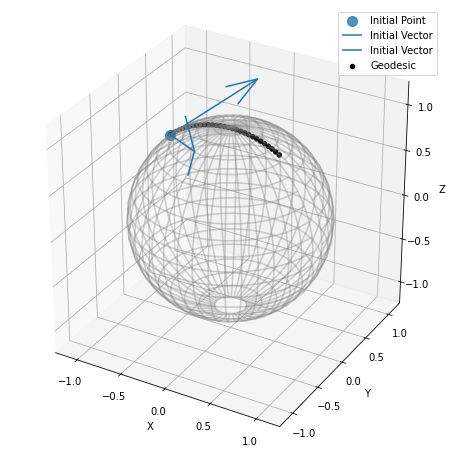

In [30]:
fig = plt.figure(figsize=(8, 8)); ax = fig.add_subplot(111, projection="3d"); ax = viz.plot(point, ax=ax, space="S2", s=100, alpha=0.8, label="Initial Point"); arrow = viz.Arrow3D(point, vector=tangent_vector); arrow.draw(ax, color="C0", label="Initial Vector"); arrow = viz.Arrow3D(point, vector=sphere.to_tangent(vector+np.array([2., -2.4, -0.8]), base_point=point)); arrow.draw(ax, color="C0", label="Initial Vector"); ax = viz.plot(points_on_geodesic, ax=ax, space="S2", color="black", label="Geodesic"); ax.legend();

Let's gain intuition of what a Christoffel symbol represents through an example.

Consider a 3-dimensional manifold, where $e_1, e_2, e_3$ is a basis of the tangent space at a point $p$:
$$
\nabla_{e_1} e_3=
\Gamma_{13}^{1} e_1 
+ \Gamma_{13}^{2} e_2
+ \Gamma_{13}^{3} e_3
$$ 

$\color{#047C91}{\text{Example}}$: $\Gamma_{13}^{2}$ tells us the rate of change (in the $e_2$ direction) of $e_3$ when we move $e_3$ in the direction of $e_1$.



Consider a single vector $\vec{a}$ on a manifold.
(show picture of a vector a on a manifold vectors in the same tangent space) be trivial. 

If you moved vector a to a different point in cartesian coordinates, the vector itself would not change.
(picture: show a vector moving from one point to another in cartesian coordinates, with nothing changing. show the set of basis vectors at each point)
after this transformation.

(show picture of a vector moving from one point to another on a manifold. show different basis vectors at each point.) the vector $\vec{a}$ will change if it is moved an infinitesimally small distance in the direction of $\vec{b}$.


Of course, the connection is importnat becasue it tells you how much a vector will change when you move it along a manifold. However, it is also important for another, more mathematically profound, reason than this. The connection is especially important because it defines how to evaluate whether two vectors on a manifold are parallel (NOTE TO SELF: I am not sure if this wording is exactly correct). To understand what this means, we will have to introduce two new concepts:  
parallel vector fields
 , which will allow us to introduce the notion of  
parallel transport
 .

# What Tools Do We Get From a Connection?


A connection is important because it defines:
- Parallelism and parallel transport --> will be crucial in geometric deep learning.
- Exp, Log and geodesics --> Useful as the basic building blocks of ML!

on manifolds.

<center><img src="figs/01_tools.jpeg" width=400px alt="default"/></center>

# Recall: Parallelism on vector spaces

Consider a vector space with parallel vectors on it.

<center><img src="figs/01_vectorspace.png" width=400px alt="default"/></center>

- It is intuitive to "parallel transport" a vector: we transport it with a translation so that it stays parallel to itself at all times.
- Similarly, a parallel vector field is a field of vectors that are all 2-by-2 parallel.

# Parallelism on manifolds

- On manifolds, instead of giving the definition of parallel vectors, 
- we have a definition of vector fields whose vectors along a curve are parallel.

$\color{#EF5645}{\text{Mathematical Definition:}}$ Consider:
- $M$ a manifold equipped with a connection $\nabla$,
- $X$ a vector field on $M$ (one vector for each point on $M$),
- a curve $\gamma:[a, b] \rightarrow M$ in $M$.

We say that the vector fied $X$ is parallel on $\gamma$ if
$$
\nabla_{\dot{\gamma}(t)} X(t)=0
$$

$\color{#EF5645}{\text{Explanation:}}$ A vector field $X(t)$ is said to be parallel along $\gamma(t)$ if its orientation with respect to $\dot\gamma(t)$ (the tangent vector at some point $t$ does not change as a vector $X(t)$ moves along the curve $\gamma(t)$.

$\color{#047C91}{\text{Example}}$: Consider the curve $\gamma$ with tangent vectors $\dot{\gamma} .$ Now consider a vector $x \in X(t)$. Because $X(t)$ is parallel to $\dot \gamma(t)$, .. will not change as you move along the curve $\gamma$ (show three pictures of $x$ moving along gamma and not changing orientation with respect to tangent vectors.)

# Parallel transport on manifolds

$\color{#EF5645}{\text{Intuition:}}$ The parallel transport, denoted $X(t_1)=\prod_{\gamma, t_1}^{t_0} X(t_0)$ tells us what a vector $X(t_0)$ at the point $\gamma(t_0)$ will look like at $\gamma(t_1)$ if it is transported while creating parallel vectors on the way, i.e.
$$\nabla_{\dot{\gamma}(t)} X(t)=0 \quad \text{for all $t \in [t_0, t_1]$}$$

$\color{#EF5645}{\text{Remarks:}}$
- The parallel transport transports a vector from one tangent space $\left(T_{\gamma(t_0)} M\right)$ to another tangent space $\left(T_{\gamma(t_1)} M\right)$.
- In the same way that the connection tells us how to transport a vector an infinitesimally small distance along a manifold, the parallel transport tells us how we can transport a vector over larger distances along a curve.

(picture: first picture is of u at gamma(a). next picture shows a dotted line where u used to be, and a dotted line along gamma from a to b. at point b, show vector u', which has the same orintation to gamma dot (b) as u had to gamma dot a. maybe include angle that shows taht the angels are the same.)



# Geodesics

$\color{#EF5645}{\text{Mathematical Definition:}}$ Consider $M$ a manifold with a connection $\nabla$. A curve $\gamma:[t_0, t_1] \rightarrow M$ is a geodesic of $(M, \nabla)$ if it is "auto-parallel", i.e. for all $t \in[t_0, t_1]$
$$
\nabla_{\dot{\gamma(t)}} \dot{\gamma}(t)=0 \text{ for all $t \in [t_0, t_1]$.}
$$
The equation above is called the geodesic equation, and can be written using the coordinates of the connexion, i.e. the Christoffel symbols:
$$
\ddot{\gamma}^{k}(t)+\Gamma_{i j}^{k} \dot{\gamma}^{i}(t) \dot{\gamma}^{j}(t)=0 .
$$

$\color{#EF5645}{\text{Explanation:}}$ The tangent vector to the curve $\gamma$ stays parallel (to itself) when transported along the curve. The geodesics are the generalizations of the straight lines in a vector space.

$\color{#EF5645}{\text{Remark:}}$ $\nabla_{\dot{\gamma}} \dot{\gamma}$ can be interpreted as the covariant acceleration of $\gamma$: geodesics are curves with zero acceleration.


# Exponential Map

$\color{#EF5645}{\text{Mathematical Definition}}$: Consider a manifold $M$ with a connection $\nabla$. The $\operatorname{map}$ that "shoots" from a point $x$ with a tangent vector $v$ using the geodesic $\gamma$
$$(x, v) \mapsto \operatorname{Exp}_{x}(u) = \gamma_{x, v}(1)$$ 

is called the exponential map of $\nabla$.

$\color{#EF5645}{\text{Explanation}}$: This is the generalization of the addition of a vector to a point in a vector space.



# Logarithm Map

$\color{#EF5645}{\text{Definition}}$: The logarithm map is the inverse of the exponential map, whenever an inverse exists (see details in textbook). Given two points on the manifold $x_1$ and $x_2$, the logarithm map of $x_2$ at $x_1$ gives us the tangent vector that we should use to reach $x_2$ from $x_1$.

$\color{#EF5645}{\text{Explanation}}$: It is the generalization to manifolds of the subtraction of two vectors.

# Outline

0. Motivation: Elementary ML Operations
1. What is a connection?
2. **Why do we care about connection?**
3. How can we implement connection?
4. What is a Riemannian metric?
5. Why do we care about Riemannian metrics?
6. How can we implement Riemannian metrics?
7. Curvature
8. Visualization on manifolds

# 2. Why Do We Care About Connections?

- Connection allows us to define many of the elementary operations we need for ML:
  - $\color{#EF5645}{\text{Addition}}$: add a vector to a point ot get a point --> $\color{#047C91}{\text{Exponential}}$
  - $\color{#EF5645}{\text{Subtraction}}$: subtract two points to get a vector --> $\color{#047C91}{\text{Logarithm}}$
  - $\color{#EF5645}{\text{Straight Line}}$: computing the most direct curve between two points --> $\color{#047C91}{\text{Geodesic}}$

- Connection and its parallel transport allows us to compare trajectories of shapes...

<center><img src="figs/01_brain_trajectories.png" width=400px alt="default"/></center>
- ... specifically the acceleration of shape changes in Alzheimer's disease.

# Outline

0. Motivation: Elementary ML Operations
1. What is a connection?
2. Why do we care about connection?
3. **How can we implement connection?**
4. What is a Riemannian metric?
5. Why do we care about Riemannian metrics?
6. How can we implement Riemannian metrics?
7. Curvature
8. Visualization on manifolds

# 3. How can we implement connections?

In Geomstats, there is a specific hierarchy of "tools" that we can equip a manifold with.

<center><img src="figs/01_connection.png" width=900px alt="default"/></center>

The `Connection` class establishes the properties of the connection, which is at the root of this hierarchy.

Example of some of the methods that the `Connection` class implements are:

- christoffels: the coordinates of the connection
- geodesic_equation: the geodesic equation defined by the connection: requires (automatic) differentiation
- geodesic: the curve solution to the geodesic equation: requires integration.
- parallel_transport: of a vector along a curve.

Run the code below to see the contents of the `Connection` class.

In [ ]:
import inspect

from geomstats.geometry.connection import Connection
for line in inspect.getsourcelines(Connection)[0]:
    line = line.replace('\n','')
    print(line)

## Remark

Note that although we introduced many notions, there were no examples. This is because:
- a connection or its Christoffel symbols are rarely explicit, except when the connection comes from a Riemannian metric.
- which explains that most of the "tools" from the hierarchy above are actually metrics.

We will move to the notion of Riemannian metric, and give examples there.

# Outline

0. Motivation: Elementary ML Operations
1. What is a connection?
2. Why do we care about connection?
3. How can we implement connection?
4. **What is a Riemannian metric?**
5. Why do we care about Riemannian metrics?
6. How can we implement Riemannian metrics?
7. Curvature
8. Visualization on manifolds

# 4. What is a Riemannian metric?

We now introduce a new structure on a differentiable manifold: the Riemannian metric, that allows to define the length of a curve, a distance function, a volume form, etc. Note that this additional structure may not be canonical, raising the thorny question of choosing the metric for the applications.

## Precise mathematical definition

Let $M$ be a smooth $d$-dimensional manifold. A Riemannian metric on $M$ (or $T M$ ) is a family $\left(\langle\cdot, \cdot\rangle_{p}\right)_{p \in M}$ of inner products on each tangent space $T_{p} M$, such that $\langle\cdot, \cdot\rangle_{p}$ depends smoothly on $p$. More formally, for any chart $\varphi, U$, and frame $\left(X_{1}, \ldots, X_{n}\right)$ on $U$, the maps
$$
p \mapsto\left\langle X_{i}(p), X_{j}(p)\right\rangle_{p} \quad 1 \leq i, j \leq n
$$
are smooth. A pair $(M,\langle\cdot, \cdot\rangle)$ is called a Riemannian manifold.

A metric is often written $g=\left(g_{p}\right)_{p \in M}$, where $g_{p}$ is the symmetric, positive definite (SPD) matrix representing the inner-product in a chart, that is
$$
g_{i j}(p)=\left\langle\left(\partial_{i}\right)_{p},\left(\partial_{j}\right)_{p}\right\rangle_{p}
$$

## 4.2 "Layman's terms" Definition

TBD

## 4.3 Levi-Civita Connection

Theorem 3.2. Let $(M, g)$ be a Riemannian manifold. There is a unique connection on $M$ that verifies for all $X, Y, Z \in \Gamma(T M)$
1. (Torsion-free) $\nabla_{X} Y-\nabla_{Y} X=[X, Y]$
2. $\left(\right.$ Compatibility) $X(\langle X, Y\rangle)=\left\langle\nabla_{X} Y, Z\right\rangle+\left\langle Y, \nabla_{X} Z\right\rangle$
This connection is called the Levi-Civita connection and is determined by the Koszul formula:
$$
\begin{aligned}
2\left\langle\nabla_{X} Y, Z\right\rangle=X &(\langle Y, Z\rangle)+Y(\langle X, Z\rangle)-Z(\langle X, Y\rangle) \\
&-\langle Y,[X, Z]\rangle-\langle X,[Y, Z]\rangle-\langle Z,[Y, X]\rangle
\end{aligned}
$$
The notion of compatibility is thus detailed in equations (10) and (11). The former is quite general but ensures unicity of the Levi-Civita connection, it is called the zerotorsion condition. The latter can be understood as a Leibniz rule where $\langle Y, Z\rangle$ is seen as a product and the derivative is $\nabla_{X}$. More precisely, this condition means that the metric is parallel with respect to the connection.

## 4.4 Christoffel Symbols of Levi-Civita Connection

Writing $\left(g^{i j}\right)_{i j}=\left(g_{i j}\right)_{i j}^{-1}$ for the inverse of the metric matrix, we obtain
$$
\Gamma_{i j}^{k}=\frac{1}{2} g^{l k}\left(\partial_{i} g_{j l}+\partial_{j} g_{l i}-\partial_{l} g_{i j}\right)
$$
Thus the Christoffel symbols can be computed from the metric $g$. This formula is rarely used by mathematicians for computations "by hand", but we shall use it in geomstats to implement pull back metrics.

## 4.5 Riemannian Exp and Log Maps

Definition 3.7 (Exp and Log maps). We call Riemannian exponential the exponential map of the Levi-Civita connection.

he Riemannian logarithm is defined as the inverse of the Exp map on the injectivity domain Inj(x) ⊆ TxM , where the Exp map is injective,

## 4.6 Length

For a $C^{1}$-curve $\gamma:[a, b] \rightarrow M$, we now define its length $L$ and total energy $E$ (also called action integral in physics) by:
$$
L(\gamma)=\int_{a}^{b}\|\dot{\gamma}(t)\| d t, \quad E(\gamma)=\int_{a}^{b}\|\dot{\gamma}(t)\|^{2} d t
$$
Note that the length does not depend on the parametrization of the curve, while the energy does. Indeed, moving along a path from $a$ to $b$ does not require the same energy if the speed is increased, but the length remains the same. This finally leads to the definition of distance.

Definition $3.8$ (Riemannian distance). Let $(M, g)$ be a Riemannian manifold, and $x, y \in M$. The Riemannian distance between $x$ and $y$ is the lower bound of the lengths of all piecewise smooth curves joining $x$ to $y$ :
$$
d(x, y)=\inf \left\{L(\gamma) \mid \gamma: I \rightarrow M \text { piecewise } C^{1}, \gamma(0)=x, \gamma(1)=y\right\}
$$
We say that $\gamma$ is minimizing if $L(\gamma)=d(x, y)$.

## 4.7 Riemannian Distance

Definition $3.8$ (Riemannian distance). Let $(M, g)$ be a Riemannian manifold, and $x, y \in M$. The Riemannian distance between $x$ and $y$ is the lower bound of the lengths of all piecewise smooth curves joining $x$ to $y$ :
$$
d(x, y)=\inf \left\{L(\gamma) \mid \gamma: I \rightarrow M \text { piecewise } C^{1}, \gamma(0)=x, \gamma(1)=y\right\}
$$
We say that $\gamma$ is minimizing if $L(\gamma)=d(x, y)$.
If $M$ is connected, this distance function is indeed a distance, and the induced topology coincides with that of $M$ (Paulin 2014, Proposition 3.13). We say that a curve $\gamma:[a, b] \rightarrow M$ is parametrized by (or resp. proportional to) arc-length if $L(\gamma)=b-a$ (resp. $\exists \lambda>0, L(\gamma)=\lambda(b-a))$. We now see that the geodesics of $(M, g)$ are the minimizing curves, and further minimize the total energy (Paulin 2014, Proposition 3.14).

## 4.8 Geodesics

Theorem 3.3. Let $(M, g)$ be a Riemannian manifold, and $\gamma:[a, b] \rightarrow M$ a $C^{1}$ curve. The following assertions are equivalent
- $\gamma$ is a geodesic;
- $\gamma$ is parametrized with constant velocity and locally minimizing;
- $\gamma$ is locally energy minimizing.
In particular, as for any $(x, v) \in T M$, the curve $\gamma: t \in \operatorname{Inj}(x) \mapsto \operatorname{Exp}_{x}(t v)$ is a geodesic, it is locally length-minimizing, so that for any $y \in \operatorname{Exp}_{x}(\operatorname{Inj}(x)), d(x, y)=$ $L(\gamma)=\|v\|$. By definition, $v=\log _{x}(y)$, so that
$$
d(x, y)=\left\|\log _{x}(y)\right\|
$$

# Outline


1. What is a connection?
2. Why do we care about connection?
3. How can we implement connection?
4. What is a Riemannian metric?
5. Why do we care about Riemannian metrics?
6. How can we implement Riemannian metrics?
7. Curvature
8. Visualization on manifolds

Questions?

# 5. Why do we care about Riemannian metrics?

TBD.

# Outline


1. What is a connection?
2. Why do we care about connection?
3. How can we implement connection?
4. What is a Riemannian metric?
5. Why do we care about Riemannian metrics?
6. How can we implement Riemannian metrics?
7. Curvature
8. Visualization on manifolds

Questions?

# 6. How can we compute Riemannian metrics?

In Geomstats, the `RiemannianMetric` class implements methods that establish the properties of the Riemannian metric. 

Example of some of the methods that the `RiemannianMetric` class implements are:

1) christoffels:
2) dist:
3) inner_product:

Run the code below to see the contents of the `RiemannianMetric` class.

In [1]:
import inspect

from geomstats.geometry.riemannian_metric import RiemannianMetric
for line in inspect.getsourcelines(RiemannianMetric)[0]:
    line = line.replace('\n','');print(line)

INFO: Using numpy backend


class RiemannianMetric(Connection, ABC):
    """Class for Riemannian and pseudo-Riemannian metrics.

    The associated Levi-Civita connection on the tangent bundle.

    Parameters
    ----------
    dim : int
        Dimension of the manifold.
    shape : tuple of int
        Shape of one element of the manifold.
        Optional, default : (dim, ).
    signature : tuple
        Signature of the metric.
        Optional, default: None.
    default_point_type : str, {'vector', 'matrix'}
        Point type.
        Optional, default: 'vector'.
    """

    def __init__(self, dim, shape=None, signature=None, default_point_type=None):
        super(RiemannianMetric, self).__init__(
            dim=dim, shape=shape, default_point_type=default_point_type
        )
        if signature is None:
            signature = (dim, 0)
        self.signature = signature

    def metric_matrix(self, base_point=None):
        """Metric matrix at the tangent space at a base point.

        Parameters
 

# 7. Curvature

n a Euclidean space, a constant field is parallel along any curve. In a Riemannian manifold in general, parallel transport depends on the curve followed, and there may not exist fields that are parallel along all curves, not even localy. One can investigate the effect of parallel transport along small closed curves. Consider a point x ∈ M and the closed curves whose tangent velocities at that point span a subspace of dimension two. They introduce a deviation of parallel transport from the identity map of the tangent space at that point, and this deviation can be shown to depend only on a basis of this plane. This is due to the commuting properties of the covariant derivative, i.e. the difference between evaluating ∇X after ∇Y and vice-versa. This difference is not sufficient however to define a tensor. The following lemma gives a sufficient condition for a map to define a tensor on a manifold (Lafontaine, Gallot, et al. 2004, Proposition 1.114).

## 7.1 Precise mathematical definition

Definition 3.10 (Curvature tensor). Let $(M, \nabla)$ be a manifold equipped with a connection. The curvature tensor of $(M, \nabla)$ is defined as the map from $\Gamma(T M)^{3}$ to $\Gamma(T M)$ by
$$
R(X, Y) Z=\nabla_{X} \nabla_{Y} Z-\nabla_{Y} \nabla_{X} Z-\nabla_{[X, Y]} Z
$$
The curvature tensor of a Riemannian manifold is the curvature of its Levi-Civita connection.

In the above definition, the arguments $X, Y, Z$ are vector fields, but the tensoriality Lemma $3.1$ allows to write at any $x \in M, R_{x}$ as a map defined on tangent vectors $u, v, w \in T_{x} M$.

## 7.2 "Layman's term" definition

<center><img src="figs/01_curvature.png" width=400px alt="default"/></center>

Drawing of the distortion of geodesics compared to Euclidean tangent vectors. Arrows represent tangent vectors, thin black lines represent geodesics and we use the notation $x_{v}=\operatorname{Exp}_{x}(v)$. Curvature modifies the geodesic distance $d$ compared with the distance between $r v$ and $r w$ in $T_{x} M$ (adapted from Paulin 2014, Section 3.6.3)

## 7.3 The Euclidean space

In a Euclidean space Rd with the canonical inner-product, the connection coincides with the directional derivative, which commutes. Therefore R = 0.

## 7.4 Sectional curvature

These allow to define the sectional curvature for any $x \in M$ and $u, v \in T_{x} M$ such that $u, v$ are not collinear
$$
\kappa_{x}(u, v)=\frac{\left\langle R_{x}(u, v) v, u\right\rangle}{\|u\|^{2}\|v\|^{2}-\langle u, v\rangle^{2}}
$$
From the above properties, the value of $\kappa_{x}$ in fact only depends on the plane spanned by $(u, v)$, i.e. for any non-vanishing linear combination $\alpha u+\beta v, \kappa(\alpha u+\beta v, v)=\kappa(u, v)$. 


Theorem 3.5. The sectional curvature determines the curvature tensor.

# Outline


1. What is a connection?
2. Why do we care about connection?
3. How can we implement connection?
4. What is a Riemannian metric?
5. Why do we care about Riemannian metrics?
6. How can we implement Riemannian metrics?
7. Curvature
8. Visualization on manifolds

Questions?

# 8. Visualization on Manifolds

Overview of your homework

# Outline


1. What is a connection?
2. Why do we care about connection?
3. How can we implement connection?
4. What is a Riemannian metric?
5. Why do we care about Riemannian metrics?
6. How can we implement Riemannian metrics?
7. Curvature
8. Visualization on manifolds

Questions?